 ## Set up

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

import config
from config import LEVELS
from create_full_graph_with_single_query import read_or_create_full_graph
from visualization import plot_low_level_pathways
import lib.percolation
import matplotlib.pyplot as plt

config.set_root_wd()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f

Working directory: c:\git\pathwayanalysisplatform\proteoformnetworks


In [3]:
graphs = { l: read_or_create_full_graph(l, True, config.GRAPHS_PATH) for l in LEVELS}
# graphs_no_sm = [read_or_create_full_graph(level, False, graphs_path, v=False) for level in LEVELS]

    Reading resources\Reactome\genes_interactions.tsv
    Reading resources\Reactome\genes_vertices.tsv
    Reading resources\Reactome\genes_small_molecules_vertices.tsv
        Graph edges: 457443
        Graph nodes: 12789
        Graph genes nodes: 10804
        Graph small molecule nodes: 1947
Graph edges: 457443
Graph nodes: 12789
Graph genes nodes: 10804
Graph small molecule nodes: 1947
    Reading resources\Reactome\proteins_interactions.tsv
    Reading resources\Reactome\proteins_vertices.tsv
    Reading resources\Reactome\proteins_small_molecules_vertices.tsv
        Graph edges: 466752
        Graph nodes: 12903
        Graph proteins nodes: 10902
        Graph small molecule nodes: 1963
Graph edges: 466752
Graph nodes: 12903
Graph proteins nodes: 10902
Graph small molecule nodes: 1963
    Reading resources\Reactome\proteoforms_interactions.tsv
    Reading resources\Reactome\proteoforms_vertices.tsv
    Reading resources\Reactome\proteoforms_small_molecules_vertices.tsv
     

In [4]:
print("Number of edges: ")
e = pd.Series([graphs[l].size() for l in LEVELS], index=LEVELS)
v_entities = pd.Series([graphs[l].graph['num_' + l] for l in LEVELS], index=LEVELS)
v_small_molecules = pd.Series([graphs[l].graph['num_small_molecules'] for l in LEVELS], index=LEVELS)

sizes = pd.DataFrame({"Interactions": e, "Accessioned Entities": v_entities, "Simple Entities": v_small_molecules}, index=LEVELS)
sizes.columns.name = "Entity Type"
sizes

Number of edges: 


Entity Type,Interactions,Accessioned Entities,Simple Entities
genes,457443,10804,1947
proteins,466752,10902,1963
proteoforms,679747,14039,1963


In [5]:
degrees = {l: [graphs[l].degree(n) for n in graphs[l].nodes()] for l in LEVELS}
mins = pd.Series([min(degrees[l]) for l in LEVELS], index=LEVELS)
maxs = pd.Series([max(degrees[l]) for l in LEVELS], index=LEVELS)
avgs = pd.Series([sum(degrees[l])/len(degrees[l]) for l in LEVELS], index=LEVELS)

degrees_mma = pd.DataFrame({"Min": mins, "Max": maxs, "Avg": avgs}, index=LEVELS)
degrees_mma.columns.name = "Entity Type"
degrees_mma

Entity Type,Min,Max,Avg
genes,0,1226,71.536946
proteins,0,1227,72.347826
proteoforms,0,1451,84.756484


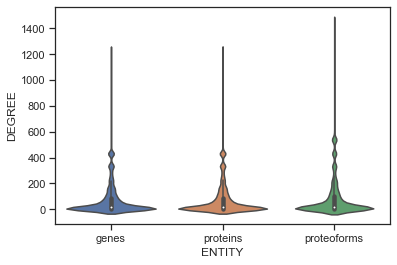

In [6]:
datas = { l: {'ENTITY': np.repeat(l, len(degrees[l])), 'DEGREE': degrees[l]} for l in LEVELS}
degrees_dfs = [pd.DataFrame(datas[l], columns=['ENTITY', 'DEGREE']) for l in LEVELS]

degrees_df = pd.concat(degrees_dfs)
sns.set(style="ticks")
ax = sns.violinplot(x="ENTITY", y="DEGREE", data=degrees_df)

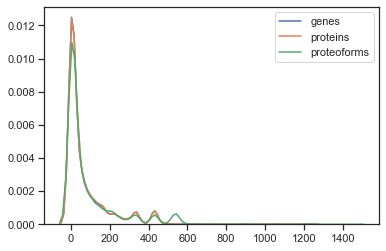

In [7]:
import matplotlib.pyplot as plt

[sns.kdeplot(degrees[l], label=l) for l in LEVELS]
plt.legend();

In [8]:
degrees = {l: [graphs[l].degree(n) for n, t in graphs[l].nodes(data='type') if t != "SimpleEntity"] for l in LEVELS}
mins = pd.Series([min(degrees[l]) for l in LEVELS], index=LEVELS)
maxs = pd.Series([max(degrees[l]) for l in LEVELS], index=LEVELS)
avgs = pd.Series([sum(degrees[l])/len(degrees[l]) for l in LEVELS], index=LEVELS)

degrees_df = pd.DataFrame({"Min": mins, "Max": maxs, "Avg": avgs}, index=LEVELS)
degrees_df.columns.name = "Entity Type"
degrees_df

Entity Type,Min,Max,Avg
genes,0,1226,79.982284
proteins,0,1227,80.914958
proteoforms,0,1451,92.907976


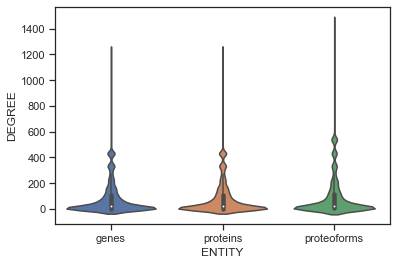

In [9]:
datas = { l: {'ENTITY': np.repeat(l, len(degrees[l])), 'DEGREE': degrees[l]} for l in LEVELS}
degrees_dfs = [pd.DataFrame(datas[l], columns=['ENTITY', 'DEGREE']) for l in LEVELS]

degrees_df = pd.concat(degrees_dfs)
sns.set(style="ticks")
ax = sns.violinplot(x="ENTITY", y="DEGREE", data=degrees_df)

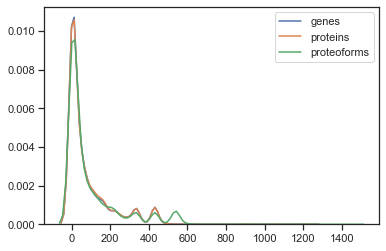

In [10]:
import matplotlib.pyplot as plt

[sns.kdeplot(degrees[l], label=l) for l in LEVELS]
plt.legend();

## Bridges and Articulation points

In [11]:
br_ap = pd.DataFrame({
    "Articulation Points": [len(list(nx.articulation_points(graphs[l]))) for l in LEVELS],
    "Bridges": [len(list(nx.bridges(graphs[l]))) for l in LEVELS]},
    index=LEVELS)
br_ap.columns.name = "Entity Type"

br_ap

Entity Type,Articulation Points,Bridges
genes,319,586
proteins,321,591
proteoforms,396,651


In [12]:
#plot_low_level_pathways(figures_path="figures/pathways/", graphs_path="reports/pathways/")

In [13]:
# TODO: Write function that plots and highlights the articulation points of an interaction network.
# TODO: Write function that plots and highlights also the bridges of the network.